<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

In [3]:
# Look at sample of dataset
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
df.shape

(985, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
# No missing value
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [7]:
# Find the issue in the data
df.describe().round(2)
# area of house cannot be negative value

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.00,985.00,985.00,985.00,985.00,985.00,985.00
mean,95750.70,2.91,1.78,1312.92,233715.95,38.45,-121.19
std,85.18,1.31,0.90,856.12,139088.82,5.10,5.10
min,95603.00,0.00,0.00,-984.00,-210944.00,-121.50,-121.55
25%,95660.00,2.00,1.00,950.00,145000.00,38.48,-121.45
50%,95762.00,3.00,2.00,1304.00,213750.00,38.63,-121.38
75%,95828.00,4.00,2.00,1718.00,300000.00,38.70,-121.29
max,95864.00,8.00,5.00,5822.00,884790.00,39.02,38.67


In [8]:
df.nunique()

street       981
city          39
zip           68
state          2
beds           8
baths          6
sq__ft       604
type           4
sale_date      5
price        605
latitude     969
longitude    967
dtype: int64

In [9]:
# Check duplicate
df.drop_duplicates(inplace = True)

In [10]:
# Odd value of area
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [11]:
# There are 1 rows that has negative area -> Drop row.
df.drop(index = 703, inplace = True)

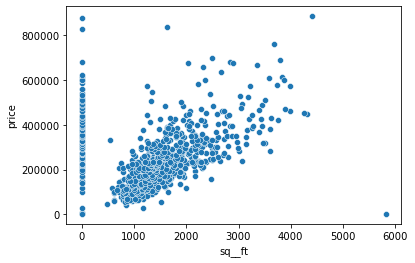

In [12]:
sns.scatterplot(data = df, x = 'sq__ft', y = 'price');

In [13]:
# sns.scatterplot(data = df[df['sq__ft'] > 500], x = 'sq__ft', y = 'price');

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [14]:
df.rename(columns = {'sq__ft' : 'sq_ft'},inplace = True)

In [15]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

C:\Users\Kant\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [16]:
df.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

In [17]:
df_new = pd.read_csv('./datasets/sacramento_cleaned_dataframe.csv')

In [18]:
df_new.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq_ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [19]:
df_new.nunique()

street       980
city          39
zip           68
state          1
beds           8
baths          6
sq_ft        603
type           4
sale_date      5
price        604
latitude     968
longitude    966
dtype: int64

In [20]:
df_new['sale_date'].value_counts()

2008-05-19    265
2008-05-16    263
2008-05-20    177
2008-05-21    158
2008-05-15    118
Name: sale_date, dtype: int64

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

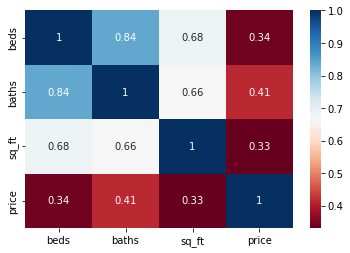

In [21]:
sns.heatmap(data = df_new[['beds','baths','sq_ft','price']].corr()
            ,annot = True, cmap = 'RdBu');
# beds, baths, sq_ft is qualify as predictors of price in an SLR model

In [22]:
df_new.select_dtypes(exclude = ['object']).columns

Index(['zip', 'beds', 'baths', 'sq_ft', 'price', 'latitude', 'longitude'], dtype='object')

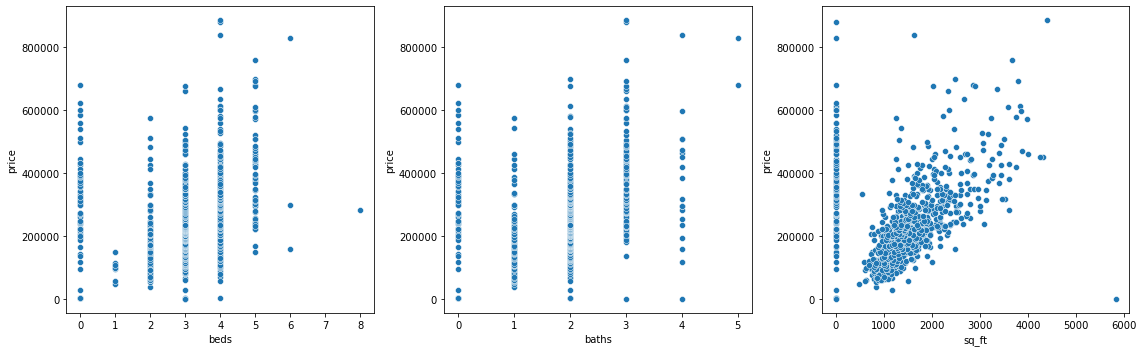

In [23]:
df_new.columns
fig, axes = plt.subplots(ncols = 3, figsize = (16,5))
sns.scatterplot(x = 'beds', y = 'price',data = df_new,ax = axes[0])
sns.scatterplot(x = 'baths', y = 'price',data = df_new,ax = axes[1])
sns.scatterplot(x = 'sq_ft', y = 'price',data = df_new,ax = axes[2])
plt.tight_layout()
# Choose only 1 variable because beds and baths
# have high correlation with sq_ft

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [24]:
# From 3 graph above, area of house (sq_ft) 
# tend to be the best predictors of prices in SLR.

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [25]:
def SLR(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    std_x = np.std(x)
    std_y = np.std(y)
    r_xy = np.corrcoef(x,y)[0,1]
    beta1 = r_xy * std_y/std_x
    beta0 = y_bar - beta1*x_bar
    return beta0, beta1

In [26]:
X = df_new['sq_ft']
y = df_new['price']
beta0, beta1 = SLR(X, y)

In [27]:
print(f'Intercept of the model = {beta0}')
print(f'Coefficient of the model = {beta1}')

Intercept of the model = 163822.2088251619
Coefficient of the model = 53.76646387650766


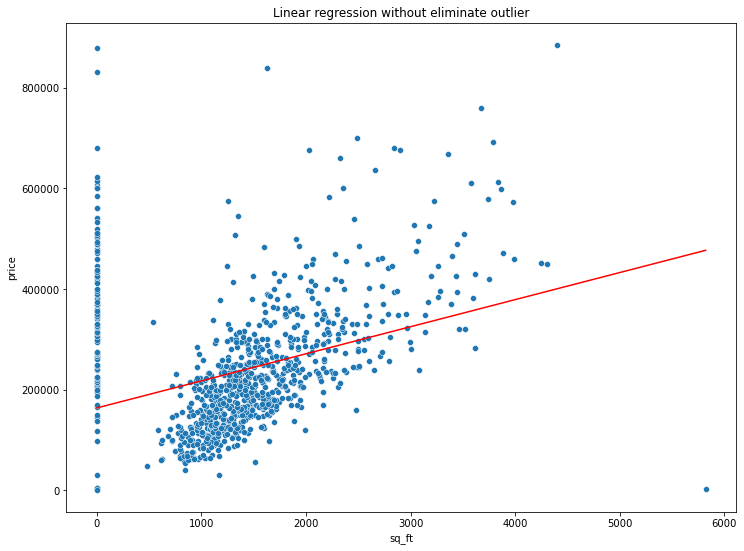

In [28]:
# model without eliminate the outlier
plt.figure(figsize=(12,9))
sns.scatterplot(x = 'sq_ft', y = 'price',data = df_new)
y_preds = beta0 + beta1*df_new['sq_ft']
sns.lineplot(x = df_new['sq_ft'], y = y_preds,color = 'red')
plt.title('Linear regression without eliminate outlier');

In [29]:
metrics.r2_score(y,y_preds)

0.11005883408040151

### Eliminate outlier

In [30]:
# X, y with eliminate the outlier
filter1 = df_new[(df_new['sq_ft'] > 200) & (df_new['sq_ft'] < 5000) \
             & (df_new['price']<800000)]

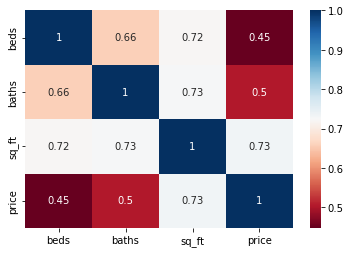

In [31]:
# Check correlation of data after eliminate the outlier
sns.heatmap(data = filter1[['beds','baths','sq_ft','price']].corr()
            ,annot = True, cmap = 'RdBu');

In [32]:
# Check number of dropped rows
print(f'#Row before filter: {df_new.shape[0]}')
print(f'#Row after filter: {len(filter1)}')
print(f'Drop row: {round((df_new.shape[0] - len(filter1))/df_new.shape[0]*100,2)} %')

#Row before filter: 981
#Row after filter: 808
Drop row: 17.64 %


In [33]:
# X,y with eliminate the outlier
X_elim = filter1['sq_ft']
y_elim = filter1['price']

Intercept of the model = 19031.09077008965
Coefficient of the model = 132.17883759937916


0.5366558922900867

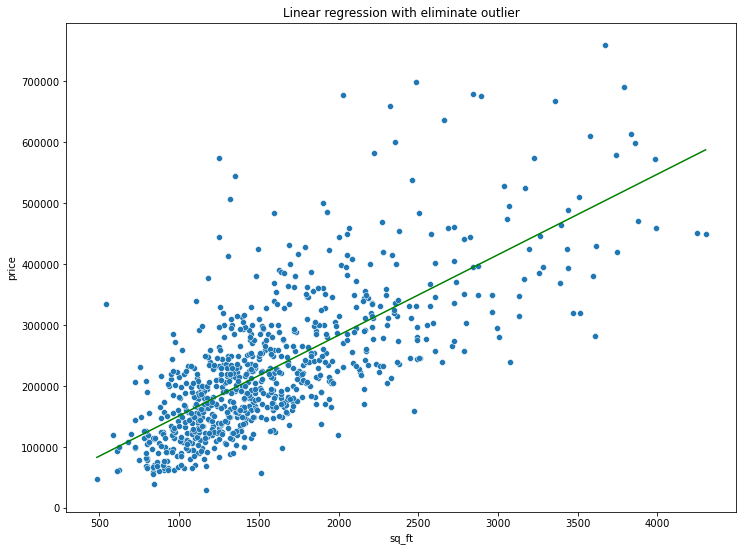

In [34]:
# model with eliminate the outlier
beta0_elim, beta1_elim = SLR(X_elim, y_elim)
print(f'Intercept of the model = {beta0_elim}')
print(f'Coefficient of the model = {beta1_elim}')

plt.figure(figsize=(12,9))
sns.scatterplot(x = X_elim, y = y_elim)
y_preds_elim = beta0_elim + beta1_elim*X_elim
sns.lineplot(x = X_elim, y = y_preds_elim, color = 'green')
plt.title('Linear regression with eliminate outlier')
metrics.r2_score(y_elim,y_preds_elim)

### 6. Interpret the intercept and the slope.

In [35]:
# For model without eliminate outlier
# Intercept: The house price is 163922$ when area of house equal to 0.
# Slope: The house price increases 53$ per square feet of house.

In [36]:
# For model with eliminate outlier
# Intercept: The house price is 19031$ when area of house equal to 0.
# Slope: The house price increases 132$ per square feet of house.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [37]:
# Prediction: Use model to predict house price by inputting the area value
# Inference: Require to understand how prices are influenced by house area

# Both prediction and infereence are under assumption.
# L : Dataset is approximately linear relation.
# I : Variable using in the model is independent to each other.

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

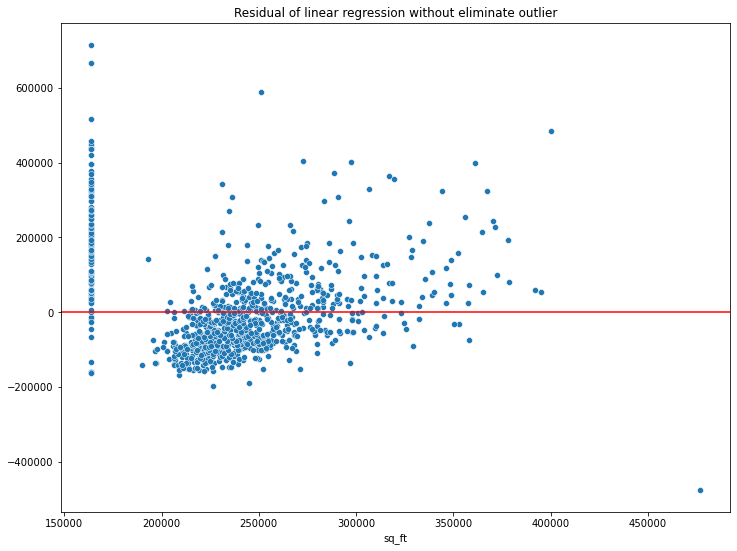

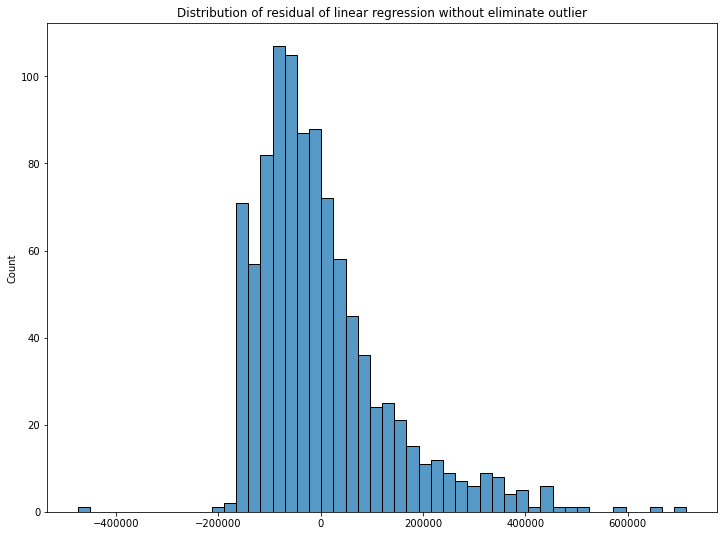

In [38]:
# Residuals without eliminate outlier
residuals = y - y_preds
plt.figure(figsize=(12,9))
sns.scatterplot(x = y_preds, y = residuals)
plt.axhline(0, color = 'red')
plt.title('Residual of linear regression without eliminate outlier')

plt.figure(figsize=(12,9))
sns.histplot(residuals, bins = 50)
plt.title('Distribution of residual of linear regression without eliminate outlier');

### Eliminate outlier

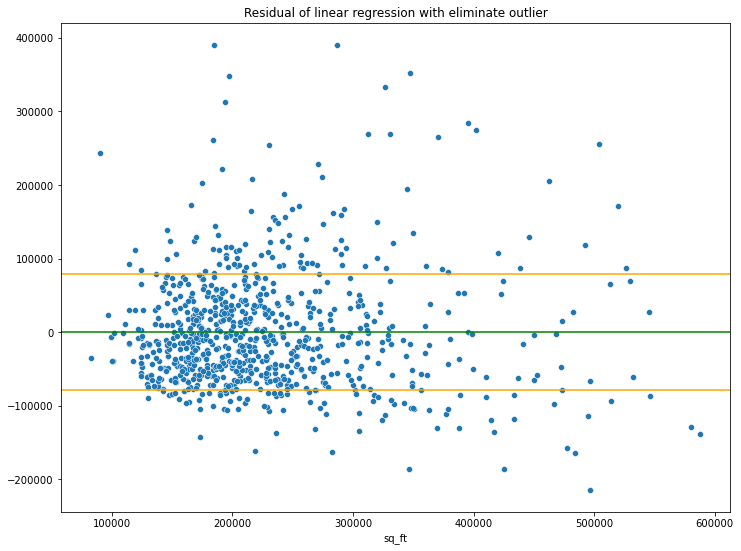

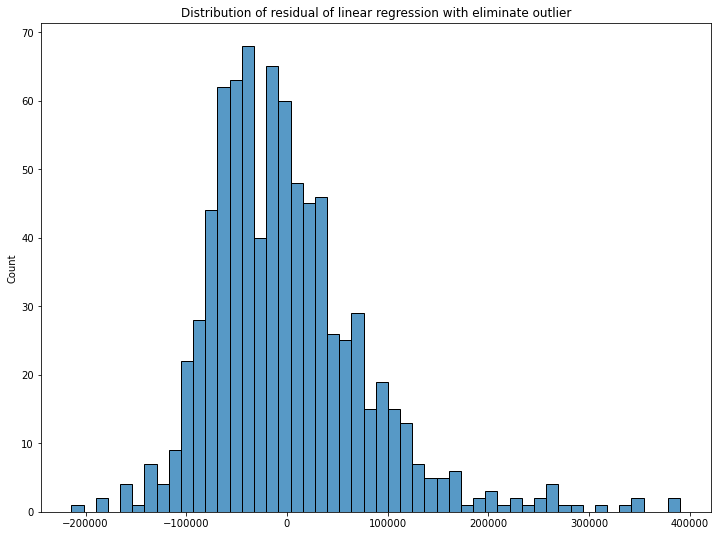

In [39]:
# Residuals with eliminate outlier
residuals_elim = y_elim - y_preds_elim
plt.figure(figsize=(12,9))
sns.scatterplot(x = y_preds_elim, y = residuals_elim)
plt.axhline(np.std(residuals_elim), color = 'orange')
plt.axhline(-np.std(residuals_elim), color = 'orange')
plt.axhline(0, color = 'green')
plt.title('Residual of linear regression with eliminate outlier')

plt.figure(figsize=(12,9))
sns.histplot(residuals_elim, bins = 50)
plt.title('Distribution of residual of linear regression with eliminate outlier');

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [40]:
# Using data with eliminate outlier (Dataframe : filter1)

In [41]:
# Explore the object column 
filter1.select_dtypes(include = ['object']).columns

Index(['street', 'city', 'state', 'type', 'sale_date'], dtype='object')

In [42]:
# Check nunique of data in columns
filter1.select_dtypes(include = ['object']).nunique()

street       807
city          35
state          1
type           3
sale_date      5
dtype: int64

In [43]:
# Check value in type column
filter1['type'].value_counts()

Residential     754
Condo            41
Multi-Family     13
Name: type, dtype: int64

In [44]:
# Check value in sale_date column
filter1['sale_date'].value_counts()

2008-05-16    213
2008-05-19    195
2008-05-21    146
2008-05-20    145
2008-05-15    109
Name: sale_date, dtype: int64

In [45]:
Xmlr = filter1[['sq_ft','type','sale_date']]
ymlr = filter1['price']
Xmlr = pd.get_dummies(data = Xmlr, columns = ['type','sale_date'],\
                      drop_first = True)

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [46]:
Xmlr.head()

,sq_ft,type_Multi-Family,type_Residential,sale_date_2008-05-16,sale_date_2008-05-19,sale_date_2008-05-20,sale_date_2008-05-21
0,836,0,1,0,0,0,1
1,1167,0,1,0,0,0,1
2,796,0,1,0,0,0,1
3,852,0,1,0,0,0,1
4,797,0,1,0,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [47]:
# Already import LinearRegression

#instantiate the model
model = LinearRegression()

In [48]:
# Fit or Train model
model.fit(Xmlr,ymlr)

LinearRegression()

In [49]:
ymlr_preds = model.predict(Xmlr)

In [50]:
model.score(Xmlr,ymlr)

0.5540332492236905

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

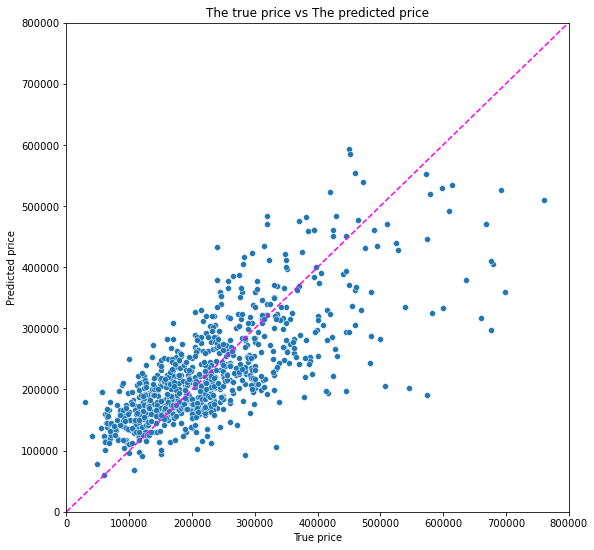

In [51]:
plt.figure(figsize=(9,9))
plt.xlim(0,800000)
plt.ylim(0,800000)
sns.scatterplot(x = ymlr,y = ymlr_preds)
sns.lineplot(x = [0,800000], y = [0,800000], color = 'magenta', linestyle = '--')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('The true price vs The predicted price');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

L and I assumption is the same assumptions for an SLR model because they are the same data.

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

skew = -1.29


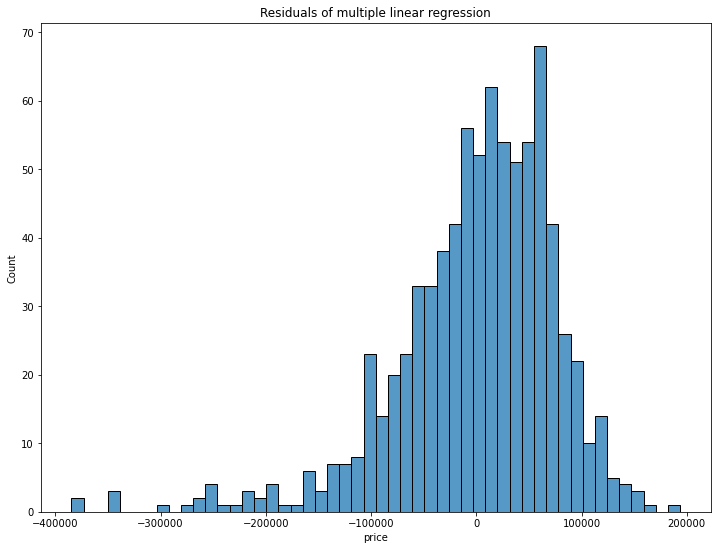

In [52]:
# N
plt.figure(figsize=(12,9))
residuals_mlr = ymlr_preds - ymlr
sns.histplot(residuals_mlr, bins = 50)
plt.title('Residuals of multiple linear regression')
print(f'skew = {pd.Series(residuals_mlr).skew().round(2)}');
# Error is negative skew. (Not normally distributed)
# The assumption N

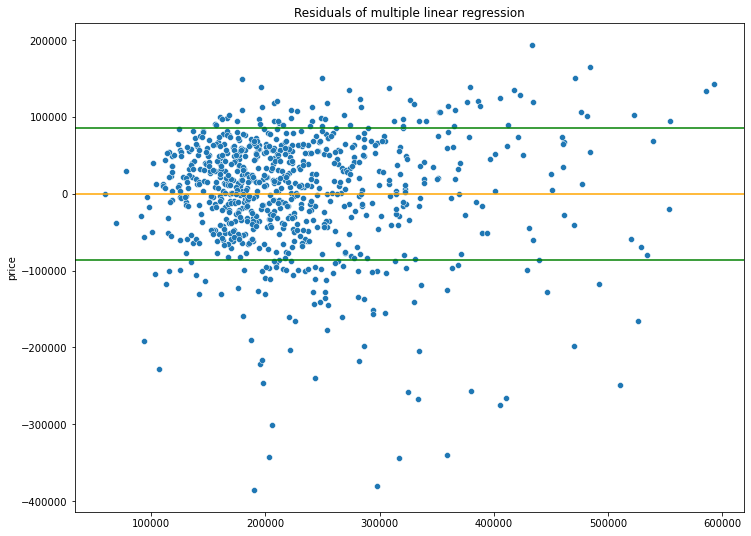

In [53]:
# E
plt.figure(figsize=(12,9))
sns.scatterplot(x= ymlr_preds, y = residuals_mlr)
plt.axhline(np.std(ymlr_preds), color = 'green') # Std line
plt.axhline(-np.std(ymlr_preds), color = 'green') # Std line
plt.axhline(0, color = 'orange')
plt.title('Residuals of multiple linear regression');
# The distribution of residual is fine.
# The assumption E may true.

In [54]:
# M : There are no more numeric column using in MLR.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [55]:
Xmlr_stat = sm.add_constant(Xmlr)

In [56]:
model_stat = sm.OLS(ymlr,Xmlr_stat).fit()

In [57]:
model_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     142.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.18e-135
Time:                        15:46:56   Log-Likelihood:                -10240.
No. Observations:                 808   AIC:                         2.050e+04
Df Residuals:                     800   BIC:                         2.053e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.946e+04   1.44e+04     -1.352      0.177   -4.77e+04    8785.721
sq_ft                  129.6386      4.466     29.027      0.000     120.872     138.405
type_Multi-Family    -4.627e+04   2.51e+04     -1.841      0.066   -9.56e+04    3066.677
type_Residential      1.975e+04   1.29e+04      1.537      0.125   -5478.589     4.5e+04
sale_date_2008-05-16  2.765e+04   9259.354      2.986      0.003    9475.116    4.58e+04
sale_date_2008-05-19  3.456e+04   9410.510      3.672      0.000    1.61e+04     5.3e+04
sale_date_2008-05-20   3.63e+04   9928.988      3.656      0.000    1.68e+04    5.58e+04
sale_date_2008-05-21  1.486e+04   9988.885      1.488      0.137   -4748.166    3.45e+04
==============================================================================
Omnibus:                      208.529   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.013
Skew:                           1.289   Prob(JB):                    1.53e-127
Kurtosis:                       6.272   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [58]:
def r2_adj(X,y):
    adj_r2 = 1 - ( 1-model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
    return adj_r2
r2_adj(Xmlr,ymlr)

0.5501310401543977

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [59]:
print(f'R2 = {metrics.r2_score(ymlr,ymlr_preds)}')
print(f'MSE = {metrics.mean_squared_error(ymlr,ymlr_preds)}')
print(f'RMSE = {metrics.mean_squared_error(ymlr,ymlr_preds,squared = False)}')

R2 = 0.5540332492236905
MSE = 5955079232.779116
RMSE = 77169.15985534062


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [60]:
list(filter1.select_dtypes(include = 'object').columns)

['street', 'city', 'state', 'type', 'sale_date']

In [61]:
filter1.nunique().sort_values()

state          1
type           3
baths          5
sale_date      5
beds           7
city          35
zip           66
price        534
sq_ft        600
latitude     800
longitude    801
street       807
dtype: int64

In [62]:
# filter1 is cleaned dataframe.
# List of feature using in model
feature1 = ['sq_ft','sale_date','type']
feature2 = ['sq_ft','sale_date','city']
feature3 = ['sq_ft','city']
feature4 = ['sq_ft','latitude','longitude']
feature5 = ['sq_ft','city','sale_date']
feature6 = ['sq_ft','city', 'type','sale_date']
feature7 = ['sq_ft', 'street', 'city', 'state', 'type', 'sale_date'] # overfitting

# Dictionary using for loop the linear regression
dict_feature = {1 : feature1,
                2 : feature2,
                3 : feature3,
                4 : feature4,
                5 : feature5,
                6 : feature6,
                7 : feature7}
y = filter1['price']
# Object type column
obj_col = list(filter1.select_dtypes(include = 'object').columns)

# Loop Linear regression with desired feature from dictionary
for i,f in dict_feature.items():
    X = filter1[f]
    for col in f:
        if col in obj_col:
            X = pd.get_dummies(data = X, columns = [col],drop_first = True)
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_preds = model.predict(X_train)
    y_preds_test = model.predict(X_test)
    print(f'Feature set: {i}, feature: {f}')
    print(f'R2_train = {round(model.score(X_train,y_train),3)}')
    print(f'R2_train_cross_val = {np.around(cross_val_score(model,X_train,y_train,cv = 3),3)}')
    print(f'R2_test = {round(metrics.r2_score(y_test,y_preds_test),3)}') # model.score(X_test,y_test) same result as metrics
    print(f'MSE_train = {round(metrics.mean_squared_error(y_train,y_preds),0)}')
    print(f'MSE_test = {round(metrics.mean_squared_error(y_test,y_preds_test),0)}')
    print(f'RMSE_train = {round(metrics.mean_squared_error(y_train,y_preds,squared = False),0)}')
    print(f'RMSE_test = {round(metrics.mean_squared_error(y_test,y_preds_test,squared = False),0)}')
    print('----------------------')

Feature set: 1, feature: ['sq_ft', 'sale_date', 'type']
R2_train = 0.563
R2_train_cross_val = [0.556 0.578 0.483]
R2_test = 0.516
MSE_train = 6080343338.0
MSE_test = 5614680822.0
RMSE_train = 77977.0
RMSE_test = 74931.0
----------------------
Feature set: 2, feature: ['sq_ft', 'sale_date', 'city']
R2_train = 0.655
R2_train_cross_val = [0.554 0.629 0.579]
R2_test = 0.638
MSE_train = 4794814813.0
MSE_test = 4201359536.0
RMSE_train = 69245.0
RMSE_test = 64818.0
----------------------
Feature set: 3, feature: ['sq_ft', 'city']
R2_train = 0.646
R2_train_cross_val = [0.547 0.627 0.569]
R2_test = 0.652
MSE_train = 4930589700.0
MSE_test = 4030740533.0
RMSE_train = 70218.0
RMSE_test = 63488.0
----------------------
Feature set: 4, feature: ['sq_ft', 'latitude', 'longitude']
R2_train = 0.58
R2_train_cross_val = [0.573 0.596 0.537]
R2_test = 0.557
MSE_train = 5838456906.0
MSE_test = 5134166582.0
RMSE_train = 76410.0
RMSE_test = 71653.0
----------------------
Feature set: 5, feature: ['sq_ft', 'ci

In [63]:
# The performance of the model increase when adding 'city' feature into the model.
# It provide better R^2, MSE and RMSE
# The best R^2 is about 0.6

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

In [64]:
# I think my model is in the sweet spot because R^2 and RMSE are not too bad.